# Reading and writting to a file

## 1) Reading files

I have created two files that are in the data directory, lets look what they are. It is easy to use shell command line using in the jupyter notebook, they just need to be preceded by the "!". For example:

In [7]:
!dir ..\data

 Datenträger in Laufwerk C: ist OS
 Volumeseriennummer: 207B-0F75

 Verzeichnis von C:\Users\d-sch\ownCloud\Code\Non-Science\HighRR_PythonWorkshop\data

17.09.2019  09:52    <DIR>          .
17.09.2019  09:52    <DIR>          ..
17.09.2019  09:52                32 animals.txt
17.09.2019  09:52                21 animals2.txt
17.09.2019  09:52                44 animals_3.txt
17.09.2019  09:52             1.443 Element_report.csv
17.09.2019  09:52               290 numbers.txt
               5 Datei(en),          1.830 Bytes
               2 Verzeichnis(se), 24.280.260.608 Bytes frei


Let's open the first file called: animals.txt

In [21]:
filin = open (r"..\data\animals.txt", "r")
lines=filin.readlines()
print(lines)
filin.close()

['Birds\n', 'Lions\n', 'Pigs\n', 'Rats\n', 'Dogs\n', 'Cats\n']


The open() instruction, open the file given in argument (be careful of the path to the file). The file is opened in readonly mode ("r"). At this point the file is only open not read. To read the file one use the .readlines() method that will create a list with the content of each line in the file. The .close() method close the file, and it's content is not available anymore when it is closed. Once the file is open and read it is possible to loop through its elements as usual.

In [22]:
for line in lines:
    print(line)

Birds

Lions

Pigs

Rats

Dogs

Cats



Each element of the list is a string. In Python it is also possible to make sure that the file is open and closed properly using the "with" instruction:

In [ ]:
with open ("../data/animals.txt", 'r') as filin :
    lines=filin.readlines()
    for line in lines:
        print(line)
    

The file is closed at the end of the indented block corresponding to with.

It is also possible to read the full file not line by line and get a single string:

In [23]:
with open (r"..\data\animals.txt", 'r') as filin :
    file=filin.read()
    print(file)

Birds
Lions
Pigs
Rats
Dogs
Cats



It is also possible to open the file line by line and iterate over them using the .readline() method. For instance:

In [24]:
with open (r"..\data\animals.txt", "r") as filin :
    line = filin .readline()
    while line != "":
        print ( line )
        line = filin.readline()

Birds

Lions

Pigs

Rats

Dogs

Cats



It is also possible to iterate directly on the opened file:

In [ ]:
with open ("../data/animals.txt", 'r') as filin :
    for line in filin:
        print(line)

## 2) Writing files

Writting files is equally simple, one just need to open a file in write mode ("w"):

In [26]:
animals2=["Pigeons","Frogs","Giraffes"]
with open (r"..\data\animals2.txt", 'w') as filout :
    for animal in animals2:
        filout.write(animal+"\n")

If one want to separate each line of the file by a new line, it has to be declared explicitely: "\n". 

It is also possible to open many files at the same time with the with option:

In [28]:
with open (r"..\data\animals.txt", "r") as file1 , open (r"..\data\animals_3.txt", "w") as file2 :
    for line in file1 :
        file2 . write ("* " + line )

## 3) Conversion types with opened files
When reading files, the content is always a string. If one has written other elements (int or float), they have to be explicitely converted to be usable. It is also important to notice that only strings can be written to files using these methods.

## 4) Exercise

- Open the file ../data/numbers.txt create a list with each value. Compute the average value and the standard deviation for this list.

- Draw a spiral: 
    - create a file spiral.py to compute the cartesian coordinates of a spiral at 2 dimensions. The cartesian coordinates $x_a$ and $y_a$ of a point A on a circle with radius $r$ are expressed in term of the polar angle $\theta$, as $x_a=cos(\theta)\times r$ and $y_a=cos(\theta)\times r$.
    - To compute the cartesian coordinates that describes the spiral, vary both parameters at the same time:
       - The angle $\theta$ will take any values from $0$ to $4\pi$ by step of 0.1
       - The circle radius r, initiale value will be 0.5 and will be incremented by 0.5.
       - You will use the module math and the functions sin and cosin:
           - math.sin(), math.cos()
           - $\pi$ is also accessible in the same module using math.pi
       - Save the coordinates in a file ./data/spiral.dat
       - Each line of the file should contain a couple of coordinate ($x_a$, $y_a$). Each values should be separated with a space, and the coordinates should be displayed with 10 characters with 5 digits.
       
   - Display the output using the following piece of code:

In [70]:
import numpy as np


nmbrlist = []
with open (r"..\data\numbers.txt") as nmbrs:
    line = nmbrs.readline()
    while line != "":
        nmbrlist.append(int(line))
        line = nmbrs.readline()
        
print(np.mean(nmbrlist), np.std(nmbrlist))

# do it as a function instead of an extra .py file
def spiral (turns = 2, innerrad = 0.5, spiralness = 0.5):
    coords = []
    currentrad = innerrad
    currentphi = 0
    phi = 0
    while phi <= 2*np.pi*turns:
        currentrad = innerrad + (phi/4*np.pi)*spiralness
        coords.append([np.cos(phi)*currentrad, np.sin(phi)*currentrad])
        phi += 0.1
    return coords

coords = spiral(turns = 50, spiralness = 0.05, innerrad = 1)
with open(r"..\data\spiral.txt", "w+") as spiral:
    for coord in coords: #sorry
        spiral.write("{0:2.8f} {1:2.8f}\n".format(coord[0],coord[1]) )
    

47.61616161616162 26.790887592502084


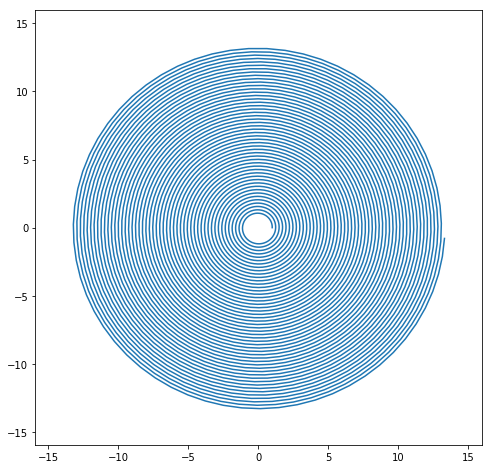

In [71]:
import matplotlib . pyplot as plt
x = []
y = []
with open (r"..\data\spiral.txt", "r") as f_in:
    for line in f_in :
        coords = line.split()
        x. append ( float ( coords [0]))
        y. append ( float ( coords [1]))
plt.figure ( figsize =(8 ,8))
mini = min (x+y) * 1.2
maxi = max (x+y) * 1.2
plt . xlim (mini , maxi )
plt . ylim (mini , maxi )
plt . plot (x, y)
#plt . savefig(r"..\figures\spirale.png")